# "Wrangle and Analyze Data" 
## Project  "WeRateDogs"
### by $\color{Chocolate}{\text{ Mina Habib }}$

### $\color{Lime}{\text{Intro}}$
   - Udacity Project for gathering, assessing and cleaning Data to make it handy, worthy, reliable to use.
  ### Motivation 
   - Bulid an interesting and trustworthy analyses and visualizations by wrangling data from the $\color{Magenta}{\text{ WeRateDogs }}$ Twitter account using Python, documented in a Jupyter Notebook.
   - Using Given Files From Udacity.
   - Enhanced Twitter Archive csv File.
   - Image Predictions tsv "Url" .
   - Additional Data via the Twitter API also Given as "Tweet_Json" File.
  ###  Opjective
   - After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points below) must be assessed.
 ###  Questions
   - What is the most common dog name?
   - What is the most common dog type and doggolingo?
   - What is the most common rating?
   - What is the relation between Retweets & Likes & Ratings?
   - What is the most five post retweeted & favorited?
   - What is the most used source?

### Headers Links

- [$\color{Orange}{\text{Gathering Data}}$](#gath)
- [$\color{Blue}{\text{Assessing Data}}$](#ase)
- [$\color{Black}{\text{issues}}$](#iss)
- [$\color{Green}{\text{Cleaning}}$](#cle)
- [ $\color{DarkMagenta}{\text{Reporting &  Analyzing & Visualizing}}$](#rep)

### $\color{Green}{\text{Importing Libraries}}$

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
from IPython.display import Image

<a id='gath'></a>
### $\color{Orange}{\text{Gathering Data}}$
- [load the twitter_archive_enhanced.csv into a DataFrame](#csv)
- [download the image prediction file from Udacity's server using the requests function](#down)
- [load the image predictions data into a DataFrame](#img)
- [Loading Data Using Twitter API](#tweet)
- [Reduce tweet_json  txt file to the necessary columns to be saved as csv](#json)

<a id='csv'></a>
### load the twitter_archive_enhanced.csv into a DataFrame

In [2]:
tweet_arc = pd.read_csv('twitter_archive_enhanced.csv')
tweet_arc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
tweet_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<a id='down'></a>
### download the image prediction file from Udacity's server using the requests function

In [4]:
url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

<a id='image'></a>
### load the image predictions data into a DataFrame


In [5]:
img_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
img_predictions.head(1), img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


(             tweet_id                                          jpg_url  \
 0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
 
    img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
 0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   
 
    p2_dog                 p3   p3_conf  p3_dog  
 0    True  Shetland_sheepdog  0.061428    True  , None)

<a id='tweet'></a>
## Loading Data Using Given Twitter API to tweet_json.txt
from tweepy import OAuthHandler
from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_arc.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

<a id='json'></a>
### Reduce tweet_json txt file to the necessary columns and to be saved as csv

In [6]:
twts_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            twts_data.append(tweet)
        except:
            continue
tweet_data = pd.DataFrame(twts_data, columns=list(twts_data[0].keys()))

tweet_data = tweet_data[['id', 'retweet_count', 'favorite_count']]
tweet_data.rename(columns={'id':'tweet_id'}, inplace=True)
tweet_data.head(), tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


(             tweet_id  retweet_count  favorite_count
 0  892420643555336193           8853           39467
 1  892177421306343426           6514           33819
 2  891815181378084864           4328           25461
 3  891689557279858688           8964           42908
 4  891327558926688256           9774           41048, None)

In [7]:
tweet_data.to_csv("tweet_data.csv")

<a id='ase'></a>
# $\color{Blue}{\text{Assessing Data}}$

In [8]:
tweet_arc.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
1211,715360349751484417,NaN,NaN,2016-03-31 02:09:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bertson. He just wants to say hi. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715360349...,11,10,Bertson,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
1813,676776431406465024,NaN,NaN,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None
198,854365224396361728,NaN,NaN,2017-04-18 16:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Einstein. He's having a really good da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854365224...,13,10,Einstein,None,None,None,None
1260,710269109699739648,NaN,NaN,2016-03-17 00:58:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The squad is back for St. Patrick's Day! ☘ 💚\n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710269109...,13,10,None,None,None,None,None
1324,706169069255446529,NaN,NaN,2016-03-05 17:26:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He was doing his best. 12/10 I'll be his lawye...,NaN,NaN,NaN,https://twitter.com/wgnnews/status/70616592080...,12,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11,10,Ralphé,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,None,None,None,None,None


In [9]:
img_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
162,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/86128...,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,0.139099,False,black-footed_ferret,0.082232,False
176,669203728096960512,https://pbs.twimg.com/media/CUl9PGBVEAUV3Wz.jpg,1,pug,0.910452,True,French_bulldog,0.055090,True,Chihuahua,0.014897,True
968,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,Tibetan_mastiff,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True
1671,813096984823349248,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,Great_Dane,0.128056,True,Boston_bull,0.117003,True,kelpie,0.086964,True
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,True,giant_schnauzer,0.159837,True
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True


In [10]:
tweet_data.sample(20)

,tweet_id,retweet_count,favorite_count
1648,683515932363329536,3291,8058
1636,684188786104872960,1343,3831
1577,687312378585812992,2146,4777
969,750101899009982464,959,3344
81,876838120628539392,3506,21125
1946,673697980713705472,2165,4067
1998,672488522314567680,482,1187
351,831315979191906304,1264,7117
907,757725642876129280,1391,5022
370,828408677031882754,1477,8398


In [11]:
tweet_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
tweet_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
tweet_arc.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
img_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [18]:
sum(img_predictions['jpg_url'].duplicated())

66

In [19]:
tweet_data.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [20]:
tweet_arc['tweet_id'].duplicated().any()

False

In [21]:
tweet_arc['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Daisy           7
an              7
Bailey          7
Buddy           7
Toby            7
Bella           6
Koda            6
Stanley         6
Leo             6
Jack            6
Rusty           6
Milo            6
Jax             6
Oscar           6
Scout           6
Dave            6
Larry           5
             ... 
Kevon           1
Bert            1
Chesterson      1
Ozzie           1
Snickers        1
Iroh            1
Rudy            1
Philippe        1
Daniel          1
Lolo            1
Danny           1
Stewie          1
Socks           1
Mary            1
Bodie           1
Willow          1
Cannon          1
Spanky          1
Major           1
Champ           1
Godzilla        1
Kobe            1
Cilantro        1
Brandonald      1
Mutt      

In [22]:
np.sort(tweet_arc['name'].unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [23]:
tweet_arc.loc[(tweet_arc['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [24]:
tweet_arc.loc[:,'doggo':'puppo'].sample(20)

,doggo,floofer,pupper,puppo
1807,None,None,pupper,None
1013,None,None,None,None
65,None,None,None,None
2047,None,None,None,None
1409,None,None,None,None
898,None,None,None,None
2281,None,None,None,None
994,None,None,None,None
1840,None,None,None,None
1617,None,None,pupper,None


In [25]:
np.sort(tweet_arc['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [26]:
np.sort(tweet_arc['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [27]:
tweet_arc['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
tweet_arc['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
np.sort(tweet_arc['text'].sample(20))

array([ "@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",
       "Here's a pupper with magic eyes. Not wearing a seat belt tho (irresponsible af). Very distracting to driver. 9/10 https://t.co/5DLJB4ssvI",
       'Meet Malikai. He was rolling around having fun when he remembered the inevitable heat death of the universe. 10/10 https://t.co/Vd2FqHIIGn',
       'Meet Winnie. She just made awkward eye contact with the driver beside her. Poor pupper panicked. 11/10 would comfort https://t.co/RFWtDqTnAz',
       "RT @dog_rates: I'm not sure what's happening here, but it's pretty spectacular. 12/10 for both https://t.co/JKXh0NbBNL",
       'RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG',
       "This is Acro. You briefly see her out of the corner of your eye. You look and she's not there. 10/10 mysterious pup https://t.co/fqiEsTduEs",
       'This is Arya. She ca

<a id='iss'></a>
# Quality
### archive table
- Sources difficult to read.
- dtype errors (tweet_id, timestamp, doggo, floofer, pupper, and puppo columns)
- Nulls represented as "None" (str) for name, doggo, floofer, pupper, and puppo columns
- Missing counts for doggo, floofer, pupper and puppo and these columns need to be combined 
- Some names identified are not names
- text column includes real rating ratio 
- Some extracted values for rating_numerator and rating_denominator seem to be in error
- drop columns that are not needed for analysis (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
### predictions table
- (tweet_id) dtype errors as intger
- Missing values from images dataset (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url
### api_data table
- (tweet_id) dtype error as intger
- Retweet and favorite information is not available for all tweets and cannot be retrieved
# Tidiness
### archive table
- There are columns (doggo, floofer, pupper and puppo) need to be combined 
### predictions table
- There are multiple columns containing the same type of data, e.g. p1, p2, p3 all contain dog breed predictions
### api_data table
- This data is separate from the other tweet data
- I have renamed id to tweet_id so can be merged later.

<a id='cle'></a>
### $\color{Green}{\text{Cleaning}}$
- [Creating Copies of the Dataframes for Data Safety & so on.](#copy)
- [Merging all dataframes.](#mrg)
- [melting columns 'doggo', 'floofer', 'pupper', 'puppo' in to doggo_lingo](#melt)
- [Droping rows and columns that we will not need](#drog)
- [Making those Columns 'source' 'tweet_id' 'timestamp' Handy for useing](#han)
- [Fixing rating numerator and denominators & Creating Rating Ratio](#fix)
- [Dog name Droping inaccurate names & finding NaNs](#nam)
- [Getting Dogs Species form there dog predictions](#get)

<a id='copy'></a>
#### Creating Copies of the Dataframes for Data Safety & so on.

In [30]:
tweet_arc_clean = tweet_arc.copy()
img_predictions_clean = img_predictions.copy()
tweet_data_clean = tweet_data.copy()

<a id='mrg'></a>
#### Merging all dataframes

In [31]:
#Merging Code
tweet_arc_clean = pd.merge(left=tweet_arc_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [32]:
tweet_arc_clean = tweet_arc_clean.merge(img_predictions_clean, on='tweet_id', how='inner')

In [33]:
#Testing
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

<a id='melt'></a>
#### melting columns 'doggo', 'floofer', 'pupper', 'puppo' in to doggo_lingo

In [34]:
tweet_arc_clean = pd.melt(tweet_arc_clean, id_vars = [x for x in tweet_arc_clean.columns.tolist() if x not in ['doggo', 'floofer', 'pupper', 'puppo']], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                         var_name = 'types', value_name = 'doggo_lingo')

In [35]:
tweet_arc_clean = tweet_arc_clean.drop('types', 1)

In [36]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 27 columns):
tweet_id                      8292 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8292 non-null object
source                        8292 non-null object
text                          8292 non-null object
retweeted_status_id           316 non-null float64
retweeted_status_user_id      316 non-null float64
retweeted_status_timestamp    316 non-null object
expanded_urls                 8292 non-null object
rating_numerator              8292 non-null int64
rating_denominator            8292 non-null int64
name                          8292 non-null object
retweet_count                 8292 non-null int64
favorite_count                8292 non-null int64
jpg_url                       8292 non-null object
img_num                       8292 non-null int64
p1                            8292 

In [37]:
print(tweet_arc_clean.doggo_lingo.value_counts())
print(len(tweet_arc_clean))

None       7959
pupper      221
doggo        80
puppo        24
floofer       8
Name: doggo_lingo, dtype: int64
8292


<a id='drog'></a>
#### Droping rows and columns that we will not need

In [38]:
# Delete the retweets
tweet_arc_clean = tweet_arc_clean[pd.isnull(tweet_arc_clean.retweeted_status_id)]

# Delete duplicated tweet_id
tweet_arc_clean = tweet_arc_clean.drop_duplicates()

# Delete tweets with no pictures
tweet_arc_clean = tweet_arc_clean.dropna(subset = ['jpg_url'])

In [39]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 7108
Data columns (total 27 columns):
tweet_id                      2311 non-null int64
in_reply_to_status_id         27 non-null float64
in_reply_to_user_id           27 non-null float64
timestamp                     2311 non-null object
source                        2311 non-null object
text                          2311 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2311 non-null int64
rating_denominator            2311 non-null int64
name                          2311 non-null object
retweet_count                 2311 non-null int64
favorite_count                2311 non-null int64
jpg_url                       2311 non-null object
img_num                       2311 non-null int64
p1                            2311 non-nu

In [40]:
# Delete columns related to retweet we don't need anymore
tweet_arc_clean = tweet_arc_clean.drop('retweeted_status_id', 1)
tweet_arc_clean = tweet_arc_clean.drop('retweeted_status_user_id', 1)
tweet_arc_clean = tweet_arc_clean.drop('retweeted_status_timestamp', 1)

# test
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 7108
Data columns (total 24 columns):
tweet_id                 2311 non-null int64
in_reply_to_status_id    27 non-null float64
in_reply_to_user_id      27 non-null float64
timestamp                2311 non-null object
source                   2311 non-null object
text                     2311 non-null object
expanded_urls            2311 non-null object
rating_numerator         2311 non-null int64
rating_denominator       2311 non-null int64
name                     2311 non-null object
retweet_count            2311 non-null int64
favorite_count           2311 non-null int64
jpg_url                  2311 non-null object
img_num                  2311 non-null int64
p1                       2311 non-null object
p1_conf                  2311 non-null float64
p1_dog                   2311 non-null bool
p2                       2311 non-null object
p2_conf                  2311 non-null float64
p2_dog                   23

In [41]:
#Delete doggo_lingo duplicates
tweet_arc_clean = tweet_arc_clean.sort_values('doggo_lingo').drop_duplicates('tweet_id', keep = 'last')

In [42]:
#Test
print(tweet_arc_clean.doggo_lingo.value_counts())
print(len(tweet_arc_clean))

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: doggo_lingo, dtype: int64
1994


In [43]:
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
tweet_arc_clean = tweet_arc_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], 1)

<a id='han'></a>
#### Making those Columns 'source' 'tweet_id' 'timestamp' Handy for useing

In [44]:
# Clean the content of source column
tweet_arc_clean['source'] = tweet_arc_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [45]:
# Change 'tweet_id' to a string
tweet_arc_clean['tweet_id'] = tweet_arc_clean['tweet_id'].astype(str)

In [46]:
#Use pd.to_datetime to convert the column from strings to DateTime objects.
tweet_arc_clean['timestamp'] = tweet_arc_clean['timestamp'].str.slice(start=0, stop=-6)
tweet_arc_clean['timestamp'] = pd.to_datetime(tweet_arc_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [47]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 7108
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-

<a id='fix'></a>
#### Fixing rating numerator and denominators & Creating Rating Ratio

In [48]:
#Fix rating numerator and denominators that are not ratings
tmp_rates = tweet_arc_clean[tweet_arc_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text
for entry in tmp_rates:
    mask = tweet_arc_clean.text == entry
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    tweet_arc_clean.loc[mask, column_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    tweet_arc_clean.loc[mask, column_2] = 10

In [49]:
tweet_arc_clean[tweet_arc_clean.text.isin(tmp_rates)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,doggo_lingo
1405,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,15043,26239,...,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,None
1527,677314812125323265,2015-12-17 02:30:09,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,611,1799,...,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True,None
1561,676191832485810177,2015-12-14 00:07:50,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,1145,2478,...,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False,None
1234,694352839993344000,2016-02-02 02:53:12,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,700,2244,...,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,None
1229,695064344191721472,2016-02-04 02:00:27,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,685,1771,...,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,None
1139,703356393781329922,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,429,2085,...,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True,None
1627,674646392044941312,2015-12-09 17:46:48,Twitter for iPhone,Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,8,10,None,557,1533,...,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True,None
1269,691483041324204033,2016-01-25 04:49:38,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,656,2608,...,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,None
1295,689835978131935233,2016-01-20 15:44:48,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,850,2369,...,collie,0.600186,True,Shetland_sheepdog,0.298939,True,borzoi,0.022616,True,None
1284,690400367696297985,2016-01-22 05:07:29,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,509,2041,...,Pembroke,0.426459,True,papillon,0.317368,True,Shetland_sheepdog,0.077616,True,None


In [50]:
#Clean decimal values in rating numerators.
tweet_arc_clean[tweet_arc_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,doggo_lingo
1451,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,542,1879,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,None
558,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,7069,20296,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,None
40,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,10407,46860,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,None
4760,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,1885,7320,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper


In [51]:
# Set correct numerators for specific tweets
tweet_arc_clean.loc[(tweet_arc_clean['tweet_id'] == 883482846933004288) & (tweet_arc_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
tweet_arc_clean.loc[(tweet_arc_clean['tweet_id'] == 786709082849828864) & (tweet_arc_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
tweet_arc_clean.loc[(tweet_arc_clean['tweet_id'] == 778027034220126208) & (tweet_arc_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
tweet_arc_clean.loc[(tweet_arc_clean['tweet_id'] == 680494726643068929) & (tweet_arc_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26
tweet_arc_clean.loc[(tweet_arc_clean['tweet_id'] == 680494726643068000) & (tweet_arc_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26


In [52]:
#Creating Rating Ratio
tweet_arc_clean['rating_numerator'] = tweet_arc_clean['rating_numerator'].astype(float)

In [53]:
tweet_arc_clean['rating_ratio'] = tweet_arc_clean.rating_numerator / tweet_arc_clean.rating_denominator

In [54]:
#test
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 7108
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 no

<a id='nam'></a>
#### Dog name Droping inaccurate names & finding NaNs

In [55]:
lowercase_names = []
for row in tweet_arc_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['by', 'officially', 'a', 'actually', 'the', 'getting', 'an', 'very', 'quite', 'light', 'space', 'just', 'one', 'incredibly', 'such', 'unacceptable', 'this', 'infuriating', 'my', 'not', 'his', 'all']


In [56]:
# Replace all names that start with a lowercase letter with a NaN
tweet_arc_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
tweet_arc_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)


In [57]:
tweet_arc_clean['name'].value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Toby          7
Daisy         7
Lola          7
Jax           6
Bella         6
Stanley       6
Koda          6
Bo            6
Louis         5
Leo           5
Milo          5
Chester       5
Oscar         5
Dave          5
Scout         5
Bailey        5
Rusty         5
Buddy         5
Maggie        4
Bentley       4
Reggie        4
Winnie        4
             ..
Bookstore     1
Kuyu          1
Gert          1
Lulu          1
Gunner        1
Godzilla      1
Daniel        1
Lucia         1
Pumpkin       1
Skittles      1
Billl         1
Rodney        1
Stubert       1
Tove          1
Hamrick       1
Stephanus     1
Arnold        1
Sid           1
Cal           1
Spanky        1
Lolo          1
Danny         1
Socks         1
Mary          1
Ralphus       1
Bodie         1
Willow        1
Levi          1
Cannon        1
Ben           1
Name: name, Length: 913,

<a id='get'></a>
#### Getting Dogs Species form there dog predictions

In [58]:
# dog prediction list
dog_type = []

def image(tweet_arc_clean):
    if tweet_arc_clean['p1_dog'] == True:
        dog_type.append(tweet_arc_clean['p1'])
    elif tweet_arc_clean['p2_dog'] == True:
        dog_type.append(tweet_arc_clean['p2'])
    elif tweet_arc_clean['p3_dog'] == True:
        dog_type.append(tweet_arc_clean['p3'])
    else:
        dog_type.append('Error')

#series objects having index the image_prediction_clean column.        
tweet_arc_clean.apply(image, axis=1)

#create new columns
tweet_arc_clean['dog_type'] = dog_type

In [59]:
#drop rows that has 'error'
tweet_arc_clean = tweet_arc_clean[tweet_arc_clean['dog_type'] != 'Error']

In [60]:
tweet_arc_clean = tweet_arc_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [61]:
tweet_arc_clean.to_csv("twiter_doggolingo.csv", index=False, encoding = 'utf-8')

In [62]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1465 to 7108
Data columns (total 14 columns):
tweet_id              1686 non-null object
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null float64
rating_denominator    1686 non-null int64
name                  1187 non-null object
retweet_count         1686 non-null int64
favorite_count        1686 non-null int64
jpg_url               1686 non-null object
doggo_lingo           1686 non-null object
rating_ratio          1686 non-null float64
dog_type              1686 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 197.6+ KB


<a id='rep'></a>
## $\color{DarkMagenta}{\text{Reporting &  Analyzing & Visualizing}}$

In [63]:
df = pd.read_csv('twiter_doggolingo.csv')
df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['doggo_lingo'] = df['doggo_lingo'].astype('category')
df['dog_type'] = df['dog_type'].astype('category')
df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1686 entries, 2015-12-24 16:00:30 to 2016-06-03 01:07:16
Data columns (total 13 columns):
tweet_id              1686 non-null object
source                1686 non-null category
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null float64
rating_denominator    1686 non-null int64
name                  1187 non-null object
retweet_count         1686 non-null int64
favorite_count        1686 non-null int64
jpg_url               1686 non-null object
doggo_lingo           1686 non-null category
rating_ratio          1686 non-null float64
dog_type              1686 non-null category
dtypes: category(3), float64(2), int64(3), object(5)
memory usage: 156.0+ KB


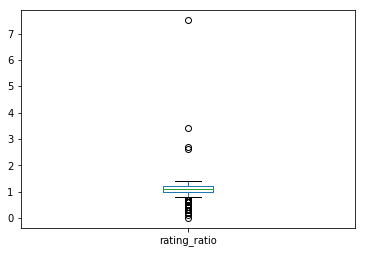

In [64]:
df.rating_ratio.plot.box()
plt.show()

In [65]:
df['source'].value_counts()

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

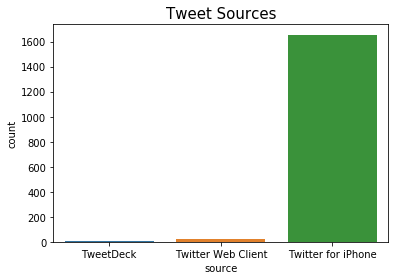

In [66]:
sns.countplot(data=df, x='source')
plt.title('Tweet Sources', size=15)
plt.savefig('most_used_twitter_source');

- the most popular source is Twitter for iPhone

Text(0.5,1,'Correlation Map')

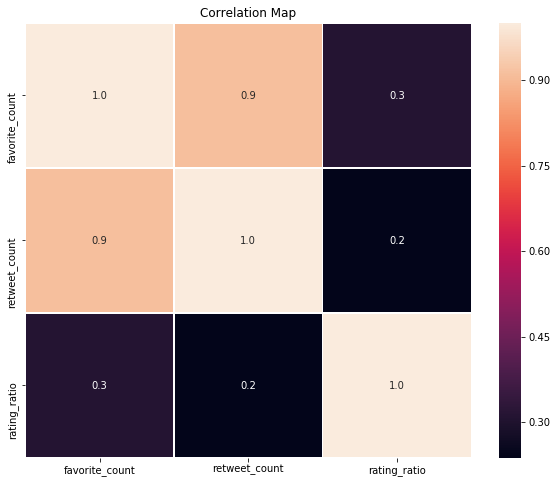

In [67]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[['source', 'favorite_count','retweet_count','rating_ratio']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between favorites and retweet, this is normal (more favorites mean more retweets)
- Rating don't get so much affected by retweeting & likes

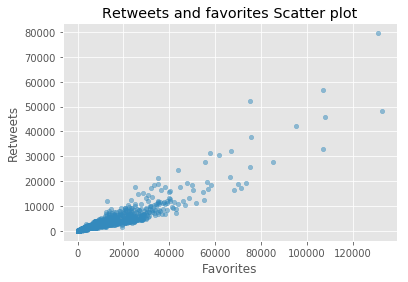

In [68]:
plt.style.use('ggplot')
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
plt.savefig('Retweets and favorites Scatter.png')

- this correlation map shows How strong combined retweet & favorites.

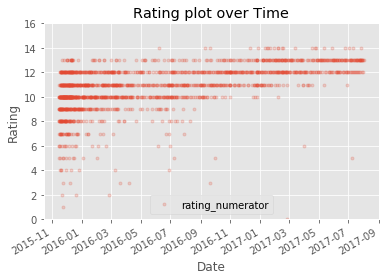

In [69]:
df.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.savefig('Rating plot over Time.png')

- ratings getting only higher by time

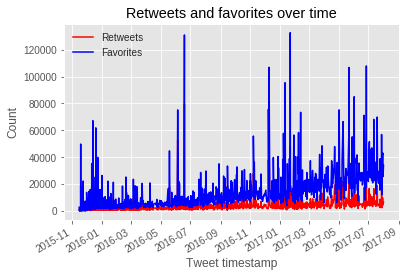

In [70]:
df['retweet_count'].plot(color = 'red', label='Retweets')
df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('Retweets and favorites over time.png')

- Retweets and favorites getting higher by time with less hiting stares

In [71]:
df['dog_type'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
Cardigan                           21
German_shepherd                    21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   18
basset      

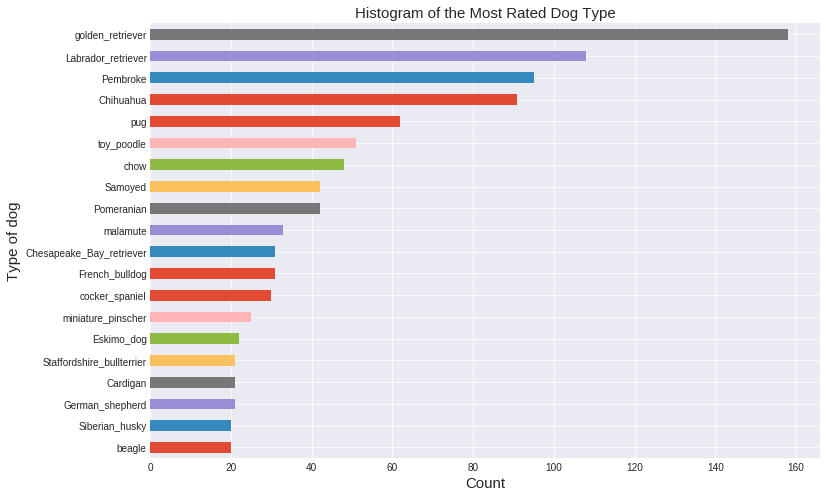

In [72]:
df_dog_type = df['dog_type'].value_counts()[0:20].sort_values(ascending=False)[::-1].plot(kind = 'barh', figsize=(12, 8))
plt.title('Histogram of the Most Rated Dog Type', size=15)
plt.xlabel('Count', size=15)
plt.ylabel('Type of dog', size=15)
plt.savefig('dog_type.png')

In [73]:
df.groupby('dog_type')['rating_ratio'].mean().sort_values(ascending=False)[0:20]

dog_type
clumber                    2.700000
Bouvier_des_Flandres       1.300000
Saluki                     1.250000
briard                     1.233333
Tibetan_mastiff            1.225000
Pomeranian                 1.219048
Border_terrier             1.214286
standard_schnauzer         1.200000
silky_terrier              1.200000
Gordon_setter              1.175000
Irish_setter               1.175000
golden_retriever           1.172333
Samoyed                    1.169048
kuvasz                     1.161111
giant_schnauzer            1.150000
wire-haired_fox_terrier    1.150000
Great_Pyrenees             1.146667
Norfolk_terrier            1.142857
chow                       1.141667
Eskimo_dog                 1.140909
Name: rating_ratio, dtype: float64

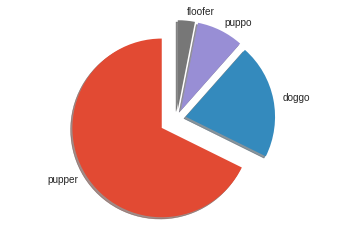

In [74]:
# Plot the data partitioned by doggo lingo
dog_stage_count = list(df[df['doggo_lingo'] != 'None']['doggo_lingo'].value_counts())[0:4]
dog_stages = df[df['doggo_lingo'] != 'None']['doggo_lingo'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')
plt.savefig('doggo_lingo.png')

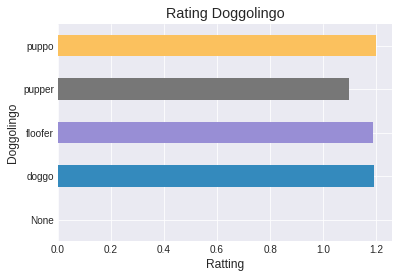

In [75]:
df[df['doggo_lingo'] != 'None'].groupby('doggo_lingo')['rating_ratio'].mean().plot(kind='barh')
plt.title('Rating Doggolingo')
plt.xlabel('Ratting')
plt.ylabel('Doggolingo')
plt.show;
plt.savefig('doggo_lingo_ratting.png')

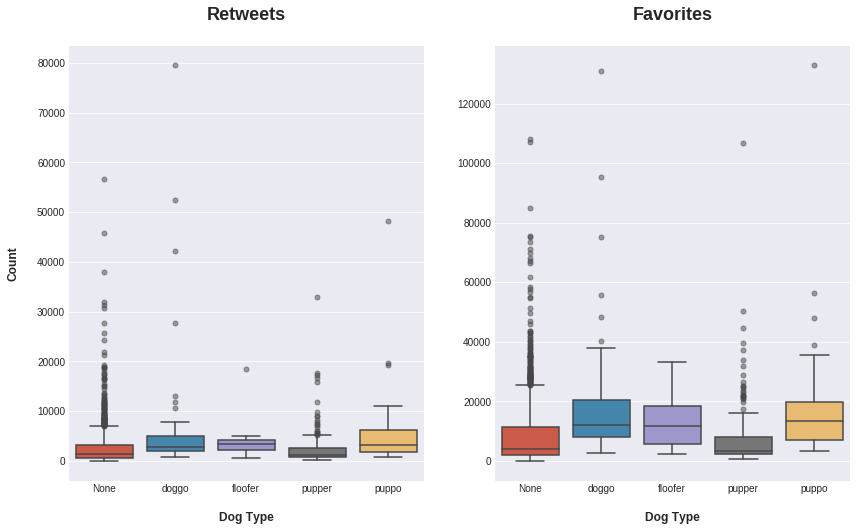

In [76]:
# Set outlier style
flierprops = dict(marker='o', alpha=0.5, markeredgewidth=1)

plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.boxplot(x=df.doggo_lingo, y=df.retweet_count, flierprops=flierprops, linewidth=1.5)
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');

plt.subplot(122)
sns.boxplot(x=df.doggo_lingo, y=df.favorite_count, flierprops=flierprops, linewidth=1.5)
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('');

### Highest Rated Retweeted


In [77]:
df2 = pd.read_csv('twiter_doggolingo.csv')
# Get index
ind = df2.retweet_count.nlargest(5).index
ind

Int64Index([1473, 693, 1460, 1674, 946], dtype='int64')

In [78]:
# Get details
high_retweet = df2[['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator', 'doggo_lingo']].iloc[ind]
high_retweet

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,doggo_lingo
1473,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,79515,131075,13.0,10,doggo
693,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,56625,107015,13.0,10,None
1460,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,52360,75163,13.0,10,doggo
1674,822872901745569793,Here's a super supportive puppo participating ...,NaN,48265,132810,13.0,10,puppo
946,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,45849,107956,13.0,10,None


In [79]:
high_retweet.describe()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000e+00,5.000000,5.00000,5.0,5.0
mean,7.985737e+17,56522.800000,110803.80000,13.0,10.0
std,5.846396e+16,13491.681482,23387.63553,0.0,0.0
min,7.392382e+17,45849.000000,75163.00000,13.0,10.0
25%,7.442348e+17,48265.000000,107015.00000,13.0,10.0
50%,8.071068e+17,52360.000000,107956.00000,13.0,10.0
75%,8.228729e+17,56625.000000,131075.00000,13.0,10.0
max,8.794158e+17,79515.000000,132810.00000,13.0,10.0


In [80]:
url_list = []
for tweet_id in high_retweet.tweet_id:
    image = df2[df2.tweet_id == tweet_id]['jpg_url']
    dups = image.duplicated()
    image = image[~dups]
    image_url = image.values[0]
    url_list.append(image_url)
    
url_list

['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg']

In [81]:
print(high_retweet.text.loc[ind[0]])
display(Image(url= url_list[0], width=150, height=150))
print(high_retweet.text.loc[ind[1]])
display(Image(url= url_list[1], width=150, height=150))
print(high_retweet.text.loc[ind[2]])
display(Image(url= url_list[2], width=150, height=150))
print(high_retweet.text.loc[ind[3]])
display(Image(url= url_list[3], width=150, height=150))
print(high_retweet.text.loc[ind[4]])
display(Image(url= url_list[4], width=150, height=150))

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d


Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC


Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY


### Highest Rated as Fav

In [82]:
# Get index
ind2 = df2.favorite_count.nlargest(5).index
# Get details
high_favorite = df2[['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator', 'dog_type']].iloc[ind2]
high_favorite

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
1674,822872901745569793,Here's a super supportive puppo participating ...,NaN,48265,132810,13.0,10,Lakeland_terrier
1473,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,79515,131075,13.0,10,Labrador_retriever
946,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,45849,107956,13.0,10,English_springer
693,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,56625,107015,13.0,10,Chihuahua
1600,866450705531457537,This is Jamesy. He gives a kiss to every other...,Jamesy,32883,106827,13.0,10,French_bulldog


In [83]:
high_favorite.describe()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000e+00,5.000000,5.000000,5.0,5.0
mean,8.240162e+17,52627.400000,117136.600000,13.0,10.0
std,5.367055e+16,17275.288791,13536.547909,0.0,0.0
min,7.442348e+17,32883.000000,106827.000000,13.0,10.0
25%,8.071068e+17,45849.000000,107015.000000,13.0,10.0
50%,8.228729e+17,48265.000000,107956.000000,13.0,10.0
75%,8.664507e+17,56625.000000,131075.000000,13.0,10.0
max,8.794158e+17,79515.000000,132810.000000,13.0,10.0


In [84]:
url_list = []
for tweet_id in high_favorite.tweet_id:
    image = df2[df2.tweet_id == tweet_id]['jpg_url']
    dups = image.duplicated()
    image = image[~dups]
    image_url = image.values[0]
    url_list.append(image_url)
    
url_list

['https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg']

In [85]:
print(high_favorite.text.loc[ind2[0]])
display(Image(url= url_list[0], width=150, height=150))
print(high_favorite.text.loc[ind2[1]])
display(Image(url= url_list[1], width=150, height=150))
print(high_favorite.text.loc[ind2[2]])
display(Image(url= url_list[2], width=150, height=150))
print(high_favorite.text.loc[ind2[3]])
display(Image(url= url_list[3], width=150, height=150))
print(high_favorite.text.loc[ind2[4]])
display(Image(url= url_list[4], width=150, height=150))

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY


This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d


This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr


### most Dogs common names

In [86]:
df2['name'].value_counts()[0:15].sort_values(ascending=False)

Charlie    10
Lucy       10
Cooper     10
Oliver      9
Tucker      9
Penny       8
Winston     7
Daisy       7
Sadie       7
Jax         6
Koda        6
Lola        6
Toby        6
Bella       5
Bo          5
Name: name, dtype: int64

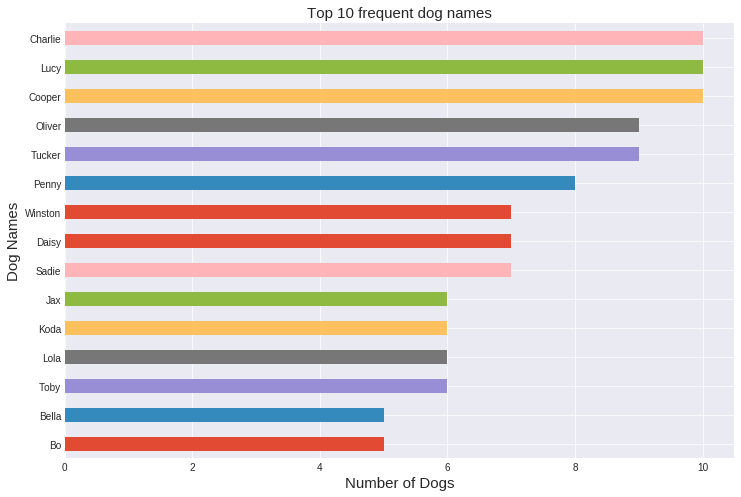

In [87]:
df_dog_name = df2['name'].value_counts()[0:15].sort_values(ascending=False)[::-1].plot(kind = 'barh', figsize=(12, 8))
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Number of Dogs', size=15)
plt.ylabel('Dog Names', size=15)
plt.savefig('doggo_name.png')